# 2 Layer Neural Network (Numpy)

In [6]:
import numpy as np

# sigmoid function

def sigmoid(x, deriv=False):
    if (deriv == True):
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

# input dataset
# generate random array of 4x3 of values between 0 and 1
# X = np.random.random((4,3))
X = np.array([[0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1]])

# output dataset
y = np.array([[0, 0, 1, 1]]).T

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
syn0 = 2 * np.random.random((3,1)) - 1

for iter in range(10000):

    # forward propagation
    l0 = X
    l1 = sigmoid(np.dot(l0, syn0))

    # how much did we miss?
    l1_error = y - l1

    # multiply how much we missed by the
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * sigmoid(l1, True)

    # update weights
    syn0 += np.dot(l0.T, l1_delta)
print("Output After Training: {}".format(l1))

Output After Training: [[0.00966449]
 [0.00786506]
 [0.99358898]
 [0.99211957]]


# 3 Layer NN (numpy)

In [16]:
X = np.array([[0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1]])

y = np.array([[0], [1], [1], [0]])
np.random.seed(1)

# randomly initialize our weights with mean 0
syn0 = 2 * np.random.random((3,4)) - 1
syn1 = 2 * np.random.random((4,1)) - 1

for j in range(60000):
    
    # Feed forward through layers 0, 1, and 2
    l0 = X
    # creates a 4x4 matrix
    l1 = sigmoid(np.dot(l0, syn0))
    # creates a 4x1 matrix
    l2 = sigmoid(np.dot(l1, syn1))

    # how much did we miss the target value?
    l2_error = y - l2

    if (j % 10000) == 0:
        print("Error: {}".format(str(np.mean(np.abs(l2_error)))))


    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error * sigmoid(l2, deriv=True)

    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)

    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta = l1_error * sigmoid(l1, deriv=True)

    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)

Error: 0.4964100319027255
Error: 0.008584525653247157
Error: 0.005789459862507806
Error: 0.004629176776769983
Error: 0.003958765280273646
Error: 0.0035101225678616736


# Self-practice

In [18]:
def tanh(x, deriv=False):
    if (deriv == True):
        return 1.0 - x ** 2
    return np.tanh(x)

# create random dataset
X = np.random.random((5,3))
y = np.random.random((5,1))
np.random.seed(1)

# randomly initialize our weights with mean 0
syn0 = 2 * np.random.random((3,5)) - 1
syn1 = 2 * np.random.random((5,2)) - 1
syn2 = 2 * np.random.random((2,1)) - 1

for j in range(100000):
    # FF through layers 0, 1, and 2
    l0 = X
    l1 = sigmoid(np.dot(l0, syn0))
    l2 = tanh(np.dot(l1, syn1))
    l3 = tanh(np.dot(l2, syn2))

    # calculate loss
    l3_error = y - l3
    if (j % 10000) == 0:
        print("Error: {}".format(str(np.mean(np.abs(l3_error)))))
    
    # calculate deltas
    l3_delta = l3_error * tanh(l3, deriv=True)
    l2_error = l3_delta.dot(syn2.T)
    l2_delta = l2_error * tanh(l2, deriv=True)
    l1_error = l2_delta.dot(syn1.T)
    l1_delta = l1_error * sigmoid(l1, deriv=True)
    syn2 += l2.T.dot(l3_delta)
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)

Error: 0.25168995792281035
Error: 0.19561270449135362
Error: 0.19370333201043927
Error: 0.19298079063250945
Error: 0.1925811629887591
Error: 0.17069830454211865
Error: 0.05302762263586425
Error: 0.04100907690432714
Error: 0.045681574815745515
Error: 0.04365314107377655


# More NN practice but with OOP

In [19]:
import numpy as np
# perceptron
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)
    
weights = np.array([0, 1])
bias = 4
n = Neuron(weights, bias)

x = np.array([2, 3])
print(n.feedforward(x))

0.9990889488055994


In [20]:
class NeuralNetwork:
    '''
    A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)
    Each neuron has the same weights and bias:
    - w = [0, 1]
    - b = 0
    '''
    def __init__(self) -> None:
        weights = np.array([0, 1])
        bias = 0

        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)

    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)

        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))

        return out_o1

network = NeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x))

0.7216325609518421


In [21]:
# MSE
def mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

y_true = np.array([1, 0, 0, 1])
y_pred = np.array([0, 0, 0, 0])

print(mse_loss(y_true, y_pred))

0.5


Epoch 0 loss: 0.278
Epoch 10 loss: 0.166
Epoch 20 loss: 0.129
Epoch 30 loss: 0.102
Epoch 40 loss: 0.082
Epoch 50 loss: 0.066
Epoch 60 loss: 0.054
Epoch 70 loss: 0.045
Epoch 80 loss: 0.038
Epoch 90 loss: 0.032
Epoch 100 loss: 0.028
Epoch 110 loss: 0.024
Epoch 120 loss: 0.021
Epoch 130 loss: 0.019
Epoch 140 loss: 0.017
Epoch 150 loss: 0.016
Epoch 160 loss: 0.014
Epoch 170 loss: 0.013
Epoch 180 loss: 0.012
Epoch 190 loss: 0.011
Epoch 200 loss: 0.010
Epoch 210 loss: 0.010
Epoch 220 loss: 0.009
Epoch 230 loss: 0.009
Epoch 240 loss: 0.008
Epoch 250 loss: 0.008
Epoch 260 loss: 0.007
Epoch 270 loss: 0.007
Epoch 280 loss: 0.007
Epoch 290 loss: 0.006
Epoch 300 loss: 0.006
Epoch 310 loss: 0.006
Epoch 320 loss: 0.006
Epoch 330 loss: 0.005
Epoch 340 loss: 0.005
Epoch 350 loss: 0.005
Epoch 360 loss: 0.005
Epoch 370 loss: 0.005
Epoch 380 loss: 0.005
Epoch 390 loss: 0.004
Epoch 400 loss: 0.004
Epoch 410 loss: 0.004
Epoch 420 loss: 0.004
Epoch 430 loss: 0.004
Epoch 440 loss: 0.004
Epoch 450 loss: 0.004

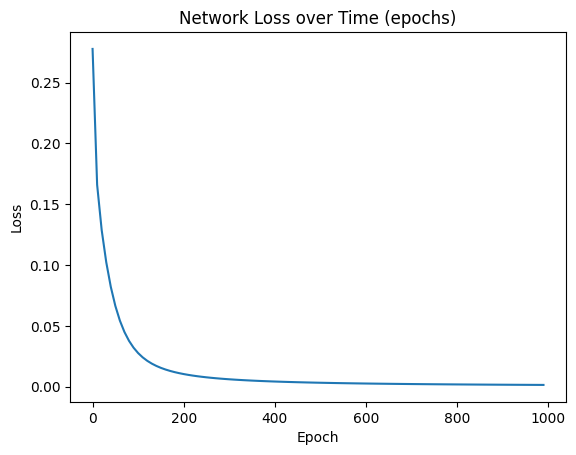

In [24]:
# Gender prediction using Height and Weight
def deriv_sigmoid(x):
    fx = sigmoid(x)
    return fx * (1 - fx)

class NeuralNetwork_2:
    '''
     A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)
    '''
    def __init__(self):
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()

        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()

    def feedforward(self, x):
        # hidden node 1
        h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
        # hidden node 2
        h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
        # output node
        o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
        return o1
    
    def train(self, data, all_y_trues):
        '''
        - data is a (n x 2) numpy array, n = # of samples in the dataset.
        - all_y_trues is a numpy array with n elements.
        Elements in all_y_trues correspond to those in data.
        '''
        alpha = 0.1
        epochs = 1000
        history = {} # {"epoch": , "loss": }

        for epoch in range(epochs):
            for x, y_true in zip(data, all_y_trues):
                # feedforward pass
                sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
                h1 = sigmoid(sum_h1)
                sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
                h2 = sigmoid(sum_h2)
                sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
                o1 = sigmoid(sum_o1)

                y_pred = o1
                partial_deriv = -2 * (y_true - y_pred)

                # backpropagation pass
                # output node
                delta_w5 = h1 * deriv_sigmoid(sum_o1)
                delta_w6 = h2 * deriv_sigmoid(sum_o1)
                delta_b3 = deriv_sigmoid(sum_o1)

                delta_h1 = self.w5 * deriv_sigmoid(sum_o1)
                delta_h2 = self.w6 * deriv_sigmoid(sum_o1)

                # hidden node 1
                delta_w1 = x[0] * deriv_sigmoid(sum_h1)
                delta_w2 = x[1] * deriv_sigmoid(sum_h1)
                delta_b1 = deriv_sigmoid(sum_h1)

                # hidden node 2
                delta_w3 = x[0] * deriv_sigmoid(sum_h2)
                delta_w4 = x[1] * deriv_sigmoid(sum_h2)
                delta_b2 = deriv_sigmoid(sum_h2)

                # update weights and biases
                # output node
                self.w5 -= alpha * partial_deriv * delta_w5
                self.w6 -= alpha * partial_deriv * delta_w6
                self.b3 -= alpha * partial_deriv * delta_b3

                # hidden node 1
                self.w1 -= alpha * partial_deriv * delta_h1 * delta_w1
                self.w2 -= alpha * partial_deriv * delta_h1 * delta_w2
                self.b1 -= alpha * partial_deriv * delta_h1 * delta_b1

                # hidden node 2
                self.w3 -= alpha * partial_deriv * delta_h2 * delta_w3
                self.w4 -= alpha * partial_deriv * delta_h2 * delta_w4
                self.b2 -= alpha * partial_deriv * delta_h2 * delta_b2

            if epoch % 10 == 0:
                y_preds = np.apply_along_axis(self.feedforward, 1, data)
                loss = mse_loss(all_y_trues, y_preds)
                history[epoch] = loss
                print("Epoch %d loss: %.3f" % (epoch, loss))

        return history

# Define dataset
data = np.array([ [-2, -1], [25, 6], [17, 4], [-15, -6] ])
all_y_trues = np.array([1, 0, 0, 1])

# Train our neural network!
network = NeuralNetwork_2()
network_history = network.train(data, all_y_trues)

# plot loss over time with axis labels and title
import matplotlib.pyplot as plt

plt.plot(list(network_history.keys()), list(network_history.values()))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Network Loss over Time (epochs)")
plt.show()

In [25]:
# Making some predictions
emily = np.array([-7, -3]) # 128 pounds, 63 inches
frank = np.array([20, 2]) # 155 pounds, 68 inches
print("Emily: %.3f" % network.feedforward(emily)) # 0.951 - F
print("Frank: {:.3f}".format(network.feedforward(frank))) # 0.039 - M

Emily: 0.969
Frank: 0.039


In [2]:
pip install torch==2.2.2 torchvision==0.17.2 torchaudio==2.2.2

   ---------------------------------------- 0.0/198.5 MB ? eta -:--:--
   ---------------------------------------- 0.2/198.5 MB 4.8 MB/s eta 0:00:42
   ---------------------------------------- 0.3/198.5 MB 3.8 MB/s eta 0:00:53
   ---------------------------------------- 0.5/198.5 MB 4.8 MB/s eta 0:00:41
   ---------------------------------------- 0.5/198.5 MB 4.8 MB/s eta 0:00:41
   ---------------------------------------- 0.5/198.5 MB 4.8 MB/s eta 0:00:41
   ---------------------------------------- 1.0/198.5 MB 3.9 MB/s eta 0:00:51
   ---------------------------------------- 1.0/198.5 MB 3.9 MB/s eta 0:00:51
   ---------------------------------------- 1.0/198.5 MB 3.9 MB/s eta 0:00:51
   ---------------------------------------- 1.0/198.5 MB 3.9 MB/s eta 0:00:51
   ---------------------------------------- 1.0/198.5 MB 3.9 MB/s eta 0:00:51
   ---------------------------------------- 1.0/198.5 MB 3.9 MB/s eta 0:00:51
   ---------------------------------------- 1.0/198.5 MB 3.9 MB/s eta 0


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\kengb\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import os
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using {device} device")

Using cpu device


In [16]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_sigmoid_stack = nn.Sequential(
            nn.Linear(4, 3),
            nn.Sigmoid(),
            nn.Linear(3, 2),
            nn.Sigmoid(),
            nn.Linear(2, 1),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_sigmoid_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_sigmoid_stack): Sequential(
    (0): Linear(in_features=4, out_features=3, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=3, out_features=2, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=2, out_features=1, bias=True)
  )
)


In [13]:
# creating random input tensor
X = torch.rand((5, 4), device=device)
print(X)
# forward pass
logits = model(X)
print(logits)
# passing model output through a softmax function
pred_probab = nn.Softmax(dim=1)(logits)
print(pred_probab)
# prediction
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

tensor([[0.8804, 0.0466, 0.9684, 0.9366],
        [0.0089, 0.9029, 0.0938, 0.2192],
        [0.6133, 0.0066, 0.0198, 0.5884],
        [0.9966, 0.6483, 0.2964, 0.2234],
        [0.6876, 0.4413, 0.3126, 0.4742]])
tensor([[-0.5515],
        [-0.5525],
        [-0.5560],
        [-0.5558],
        [-0.5545]], grad_fn=<AddmmBackward0>)
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], grad_fn=<SoftmaxBackward0>)
Predicted class: tensor([0, 0, 0, 0, 0])


In [4]:
# simple neural network with one sigmoid layer and uses adam optimizer
# include a training step for n number of epochs
class NeuralNetwork_2(nn.Module):
    def __init__(self):
        super(NeuralNetwork_2, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(4, 3),
            nn.ReLU(),
            nn.Linear(3, 2),
            nn.ReLU(),
            nn.Linear(2, 1)
        )
        self.optimizer = optim.Adam(self.linear_relu_stack.parameters(), lr=1e-3)

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
    def training_step(self, batch, epoch=1000):
        for i in range(epoch):
            # clear any previously calculated gradients before performing a backward pass
            self.optimizer.zero_grad()
            X, y = batch
            y_pred = self.linear_relu_stack(X)
            loss = F.binary_cross_entropy_with_logits(y_pred, y)
            loss.backward()
            self.optimizer.step()
            if i % 10 == 0:
                print(f"Epoch {i}, Loss: {loss}")

model = NeuralNetwork_2().to(device)
print(model)

NeuralNetwork_2(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=4, out_features=3, bias=True)
    (1): ReLU()
    (2): Linear(in_features=3, out_features=2, bias=True)
    (3): ReLU()
    (4): Linear(in_features=2, out_features=1, bias=True)
  )
)


In [5]:
X = torch.rand((5, 4), device=device)
y = torch.rand((5, 1), device=device)
batch = (X, y)
model.training_step(batch)


Epoch 0, Loss: 0.6945571899414062
Epoch 10, Loss: 0.691831648349762
Epoch 20, Loss: 0.6894746422767639
Epoch 30, Loss: 0.687234103679657
Epoch 40, Loss: 0.6850854158401489
Epoch 50, Loss: 0.6830352544784546
Epoch 60, Loss: 0.6810694932937622
Epoch 70, Loss: 0.6791685223579407
Epoch 80, Loss: 0.6773396730422974
Epoch 90, Loss: 0.6759783625602722
Epoch 100, Loss: 0.6745429039001465
Epoch 110, Loss: 0.6731823682785034
Epoch 120, Loss: 0.6718202829360962
Epoch 130, Loss: 0.6704708337783813
Epoch 140, Loss: 0.6690886616706848
Epoch 150, Loss: 0.6676868200302124
Epoch 160, Loss: 0.6662242412567139
Epoch 170, Loss: 0.6647074818611145
Epoch 180, Loss: 0.6634020209312439
Epoch 190, Loss: 0.6620863676071167
Epoch 200, Loss: 0.6606493592262268
Epoch 210, Loss: 0.6592164039611816
Epoch 220, Loss: 0.6577606201171875
Epoch 230, Loss: 0.6562814116477966
Epoch 240, Loss: 0.6547282338142395
Epoch 250, Loss: 0.6531291604042053
Epoch 260, Loss: 0.6514893770217896
Epoch 270, Loss: 0.649819016456604
Epoch 